In [1]:
# All the libraries we require
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report


## Loading Dataset and Basic Overview

In [2]:
tab = pd.read_csv(
    'winequality-red.csv')
tab


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
tab.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
tab.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
tab.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
tab.nunique()


fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [7]:
tab.describe(include="all")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


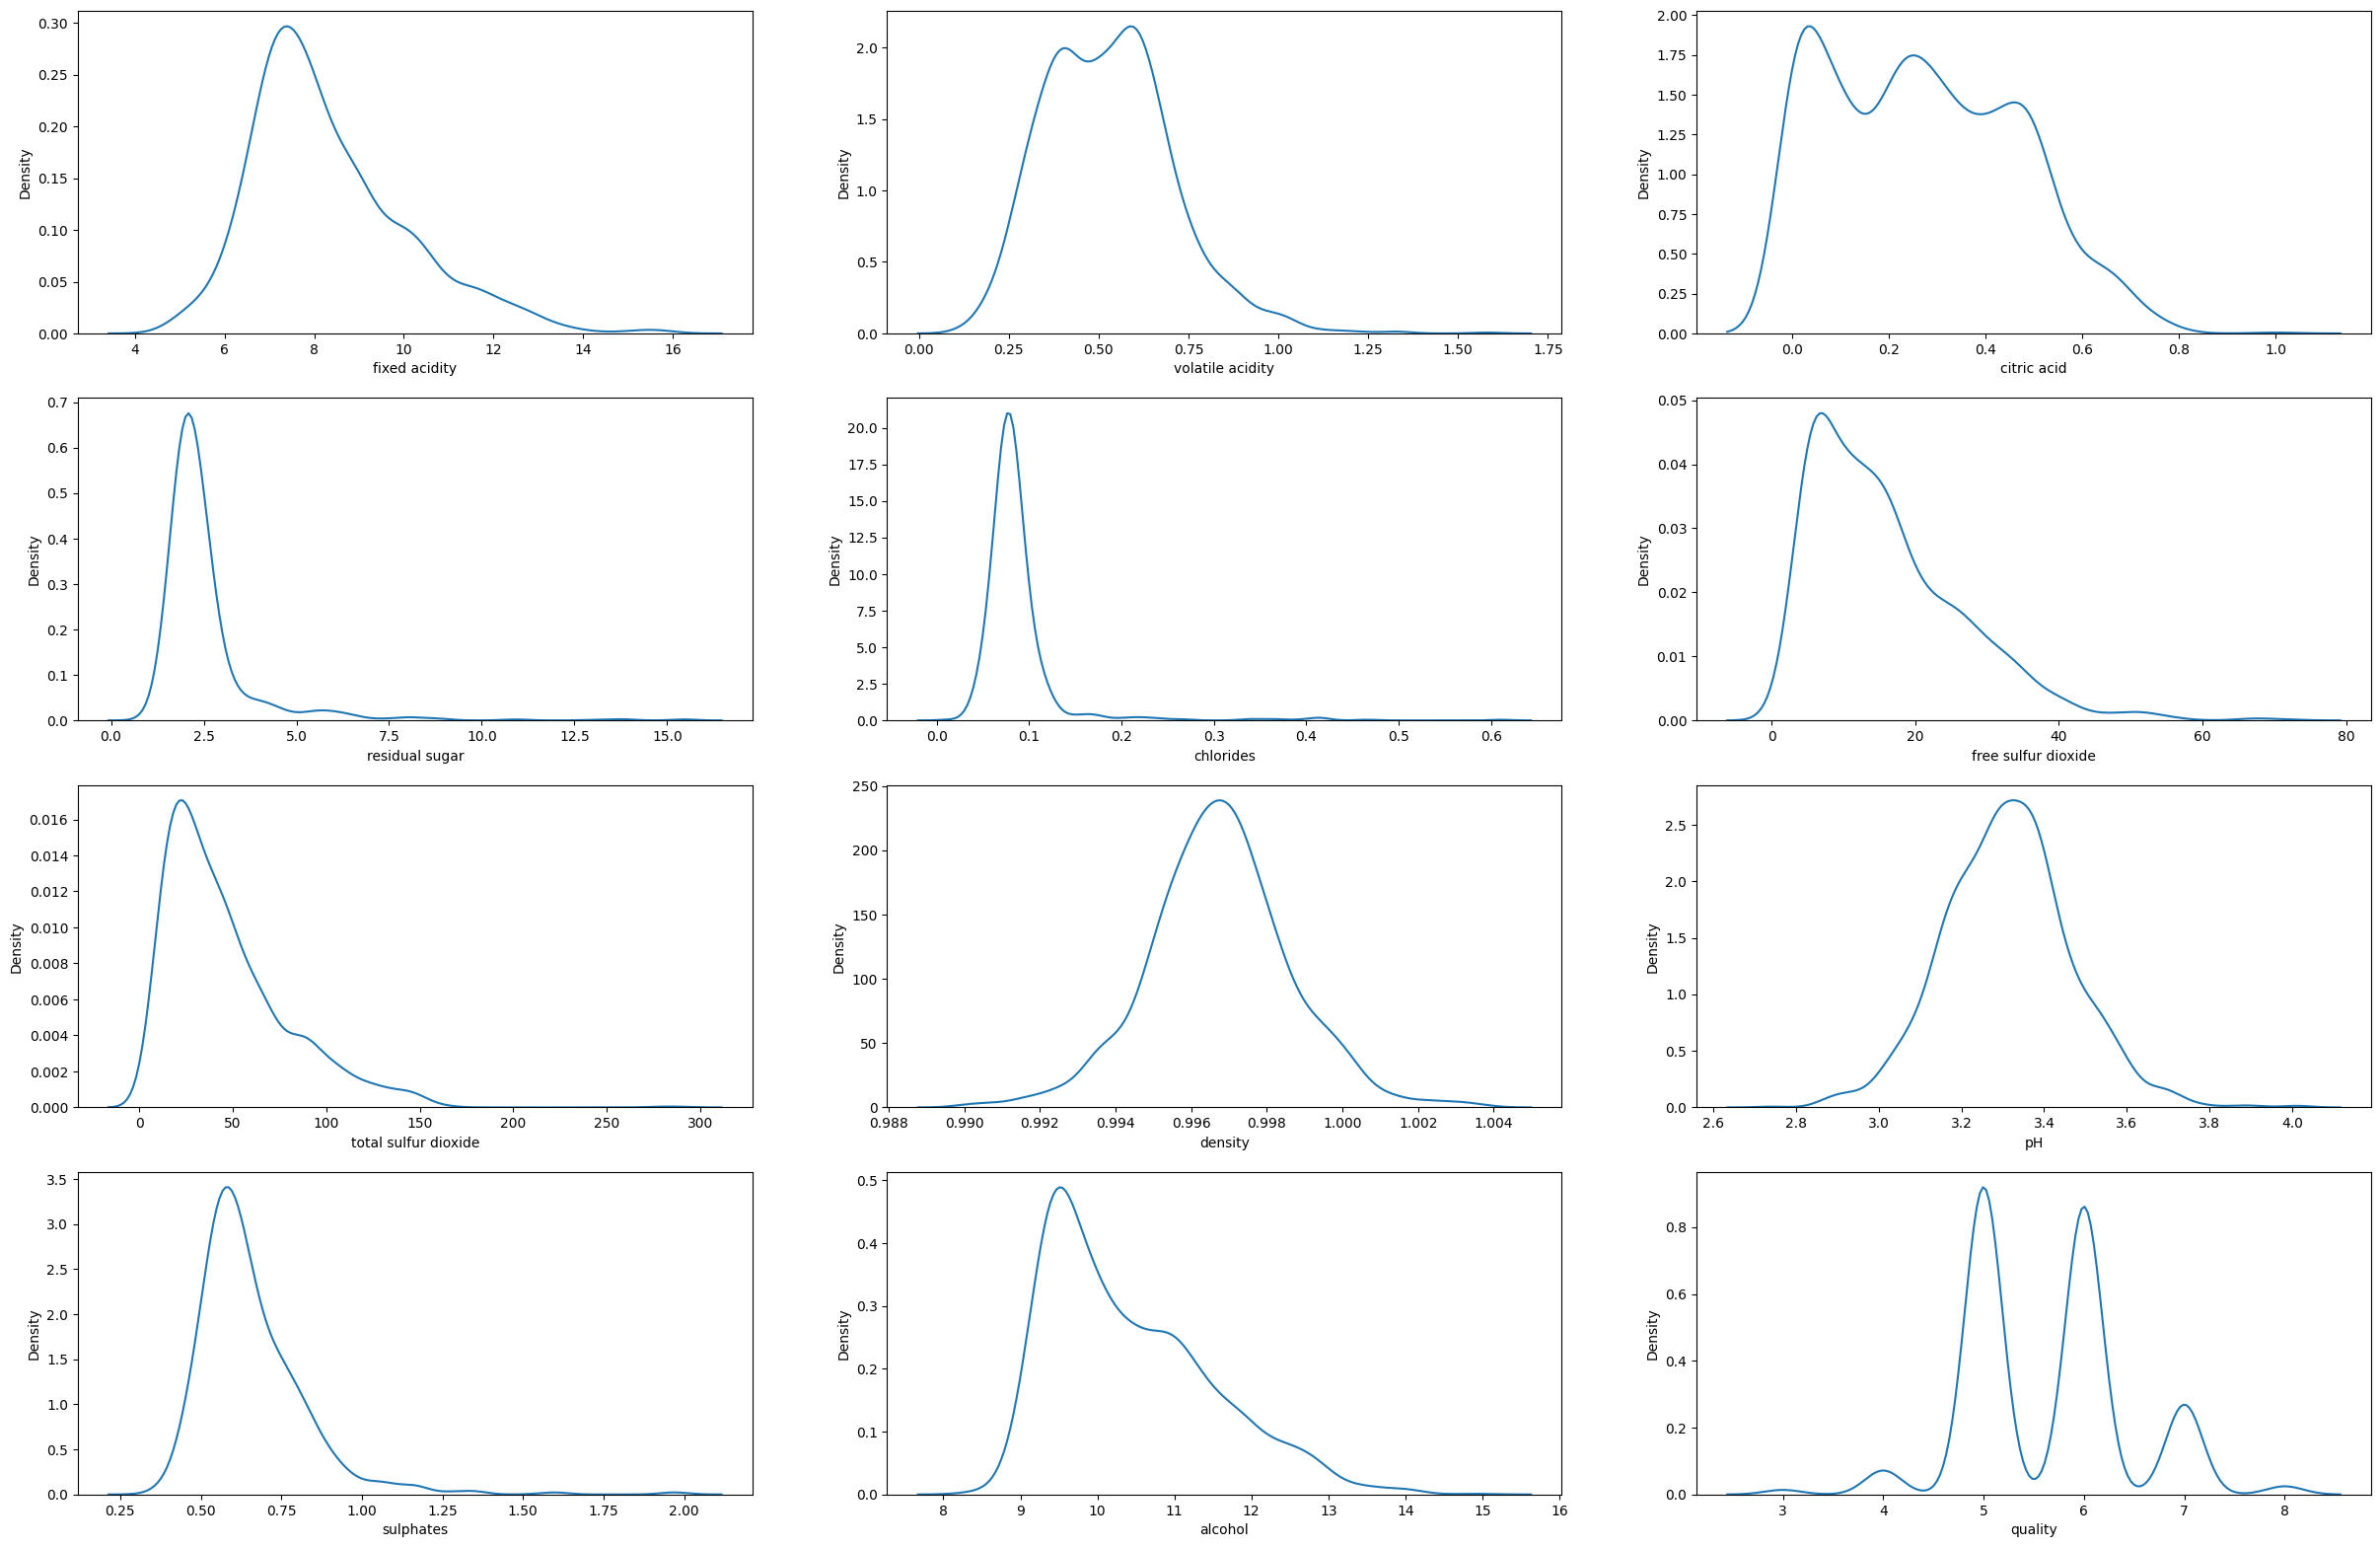

In [8]:
# Get some graphical data
plt.figure(figsize=(30, 45))
for i, col in enumerate(tab.columns):
    if tab[col].dtype != "object":
        ax = plt.subplot(9, 3, i + 1)
        sb.kdeplot(tab[col], ax=ax)
        plt.xlabel(col)

plt.show()


## BoxPlot Diagram

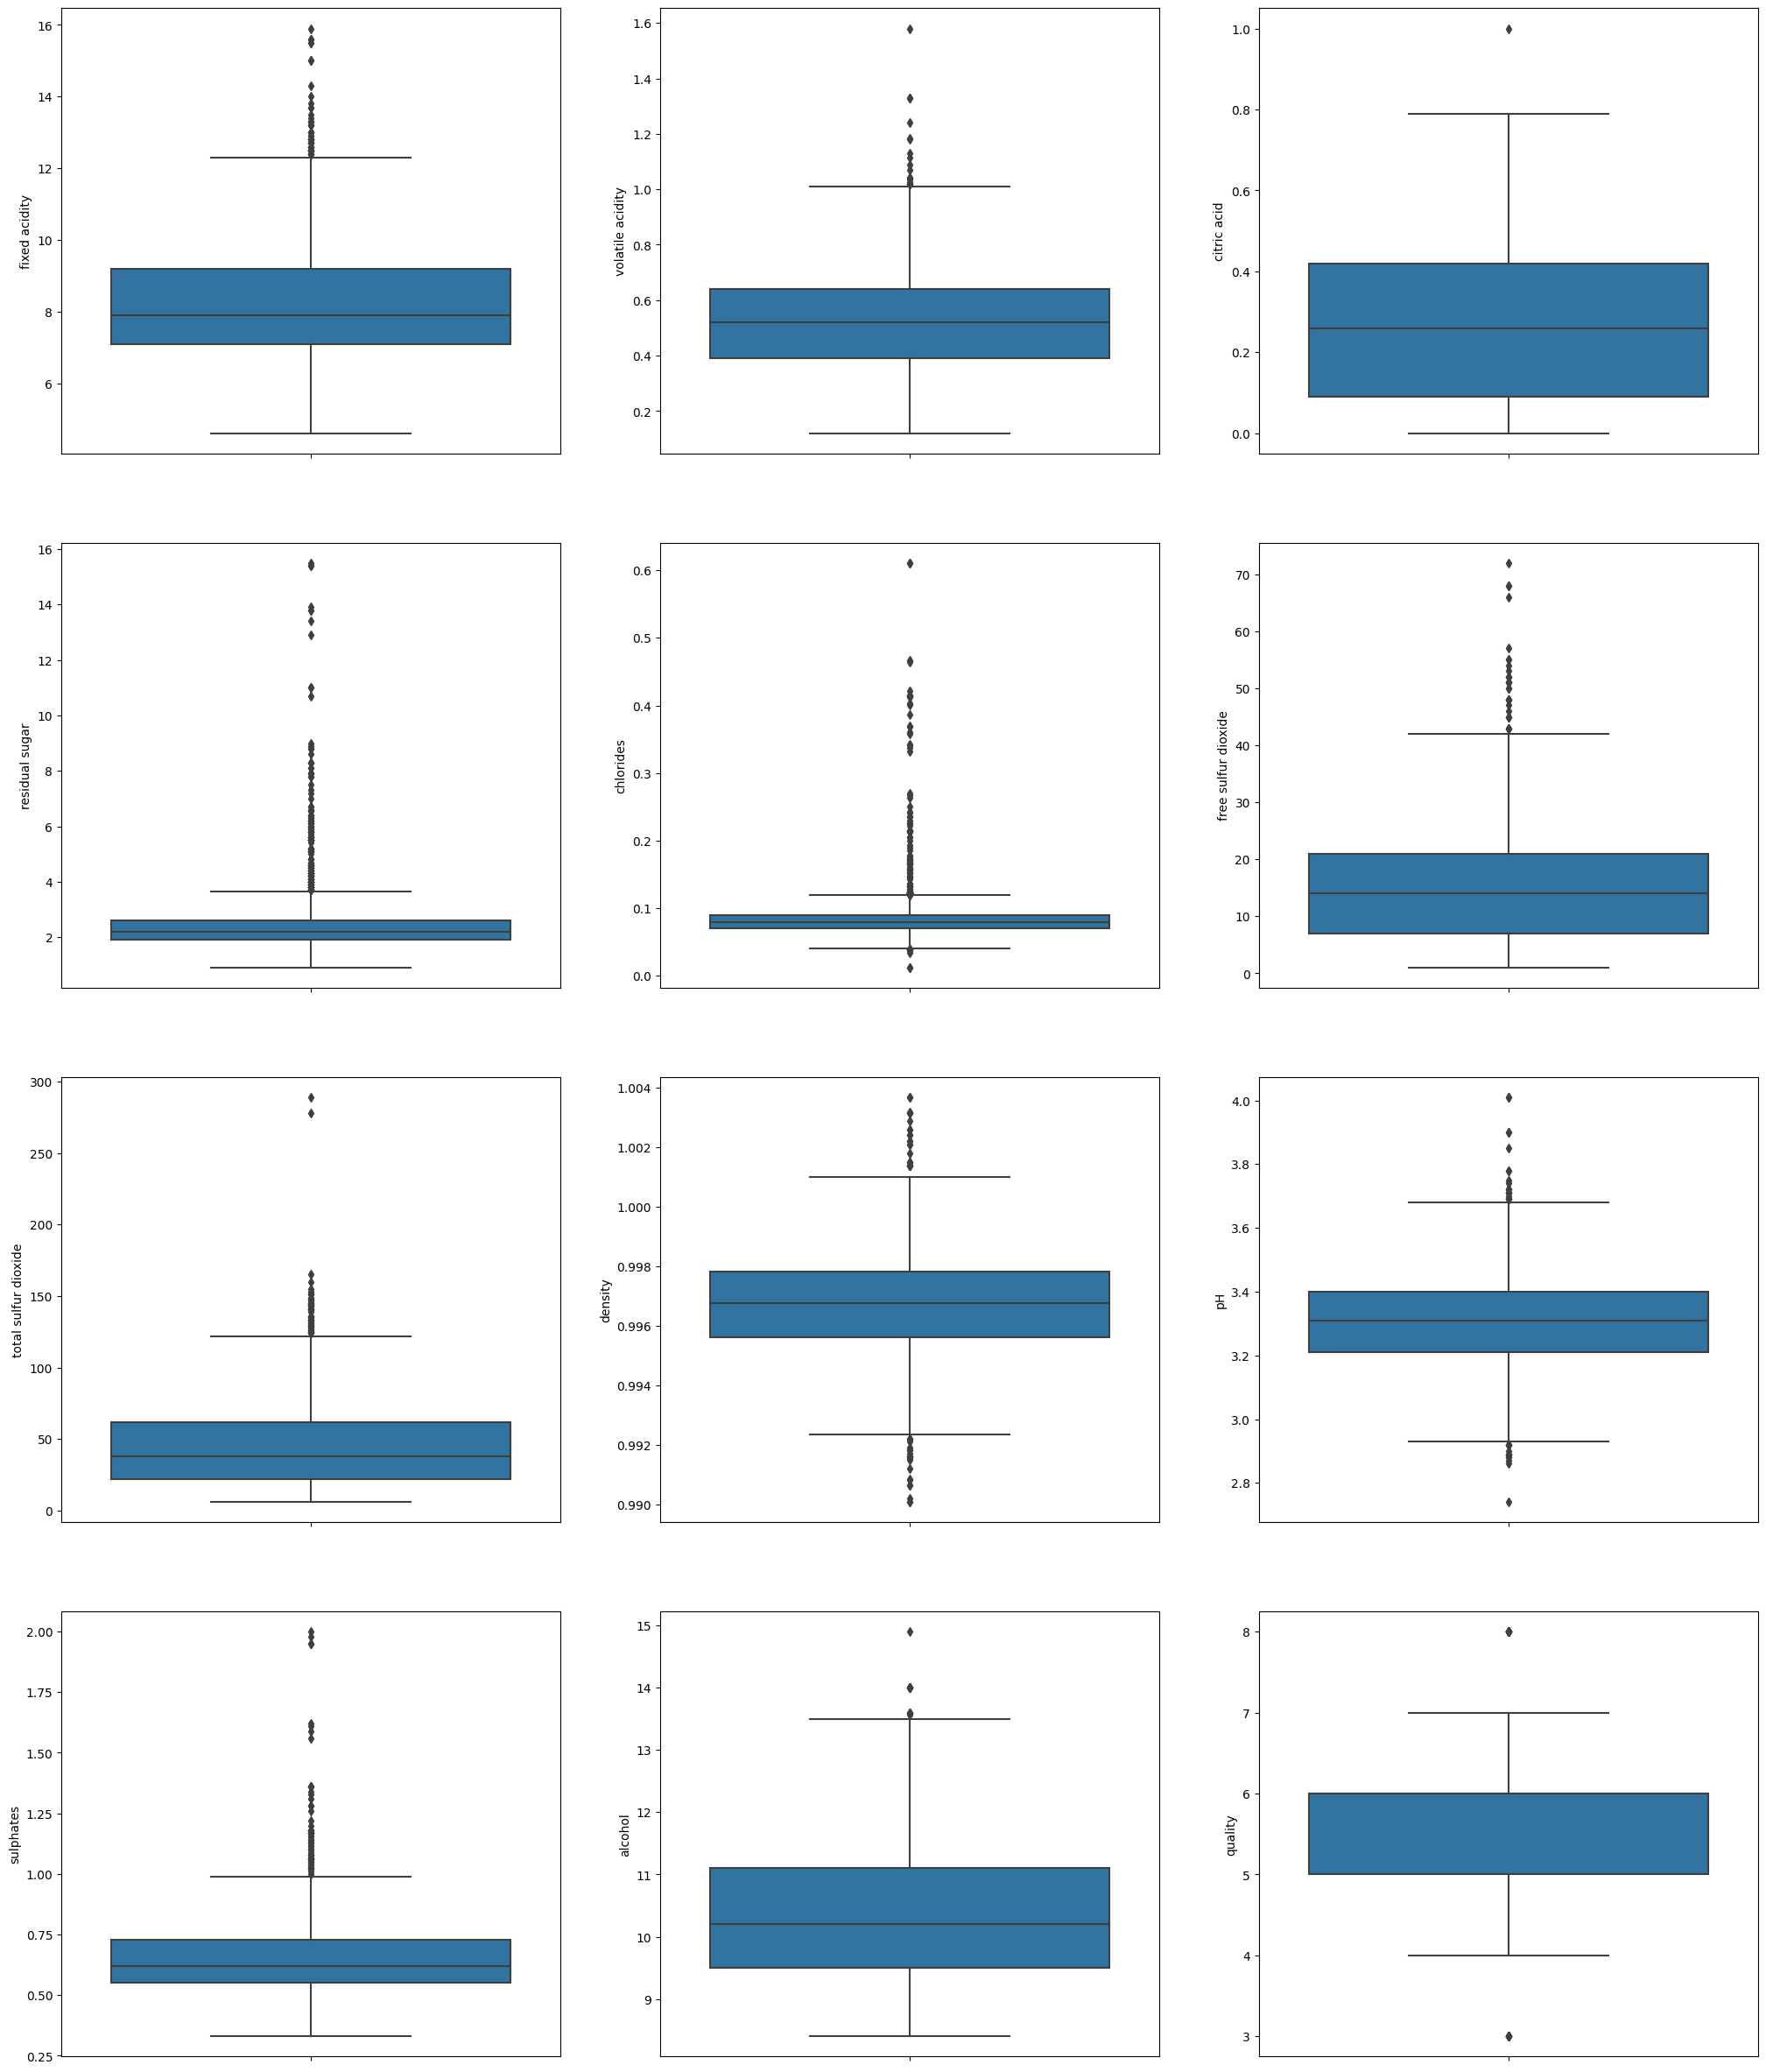

In [9]:
plt.figure(figsize=(25, 70))
for i, col in enumerate(tab.columns):
    ax = plt.subplot(9, 3, i + 1)
    sb.boxplot(y=col, data=tab)

plt.show()


#### As we can clearly see, there are a lot of outliers in our data, which can make our readings for our project unreliable. Hence, we will remove them using quantiles and InterQuartile Range 

In [10]:
col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


def quant(tab, i):
    Q1 = tab[[i]].quantile(0.25)[0]
    Q3 = tab[[i]].quantile(0.75)[0]
    IQR = Q3 - Q1
    min = tab[[i]].min()[0]
    max = tab[[i]].max()[0]
    min_IQR = Q1 - (1.5*IQR)
    max_IQR = Q3 + (1.5*IQR)
    return Q1, Q3, IQR, min, max, min_IQR, max_IQR


for i in col:
    Q1, Q3, IQR, min, max, min_IQR, max_IQR = quant(tab, i)
    print("Attribute", i, ": ")
    print("Q1: {:.2f}".format(Q1))
    print("Q3: {:.2f}".format(Q3))
    print("Min IQR: {:.2f}".format(min_IQR))
    print("Max IQR: {:.2f}".format(max_IQR))
    if(min < min_IQR):
        print("Low outlier is found: {:.2f}".format(min))
    if(max > max_IQR):
        print("High outlier is found: {:.2f}".format(max))

    def convnan(x, min_IQR=min_IQR, max_IQR=max_IQR):
        if((x > max_IQR) | (x < min_IQR)):
            x = np.nan
        else:
            x = x
        return x

    tab[i] = tab[i].map(convnan)
    tab[i] = tab[i].interpolate(method='linear')

    if(len(tab[tab[i].isnull()][i]) == 0):
        print("####################  Outliers have been interpolated  ####################")
    print()


Attribute fixed acidity : 
Q1: 7.10
Q3: 9.20
Min IQR: 3.95
Max IQR: 12.35
High outlier is found: 15.90
####################  Outliers have been interpolated  ####################

Attribute volatile acidity : 
Q1: 0.39
Q3: 0.64
Min IQR: 0.02
Max IQR: 1.02
High outlier is found: 1.58
####################  Outliers have been interpolated  ####################

Attribute citric acid : 
Q1: 0.09
Q3: 0.42
Min IQR: -0.40
Max IQR: 0.91
High outlier is found: 1.00
####################  Outliers have been interpolated  ####################

Attribute residual sugar : 
Q1: 1.90
Q3: 2.60
Min IQR: 0.85
Max IQR: 3.65
High outlier is found: 15.50
####################  Outliers have been interpolated  ####################

Attribute chlorides : 
Q1: 0.07
Q3: 0.09
Min IQR: 0.04
Max IQR: 0.12
Low outlier is found: 0.01
High outlier is found: 0.61
####################  Outliers have been interpolated  ####################

Attribute free sulfur dioxide : 
Q1: 7.00
Q3: 21.00
Min IQR: -14.00
Max IQR: 42.0

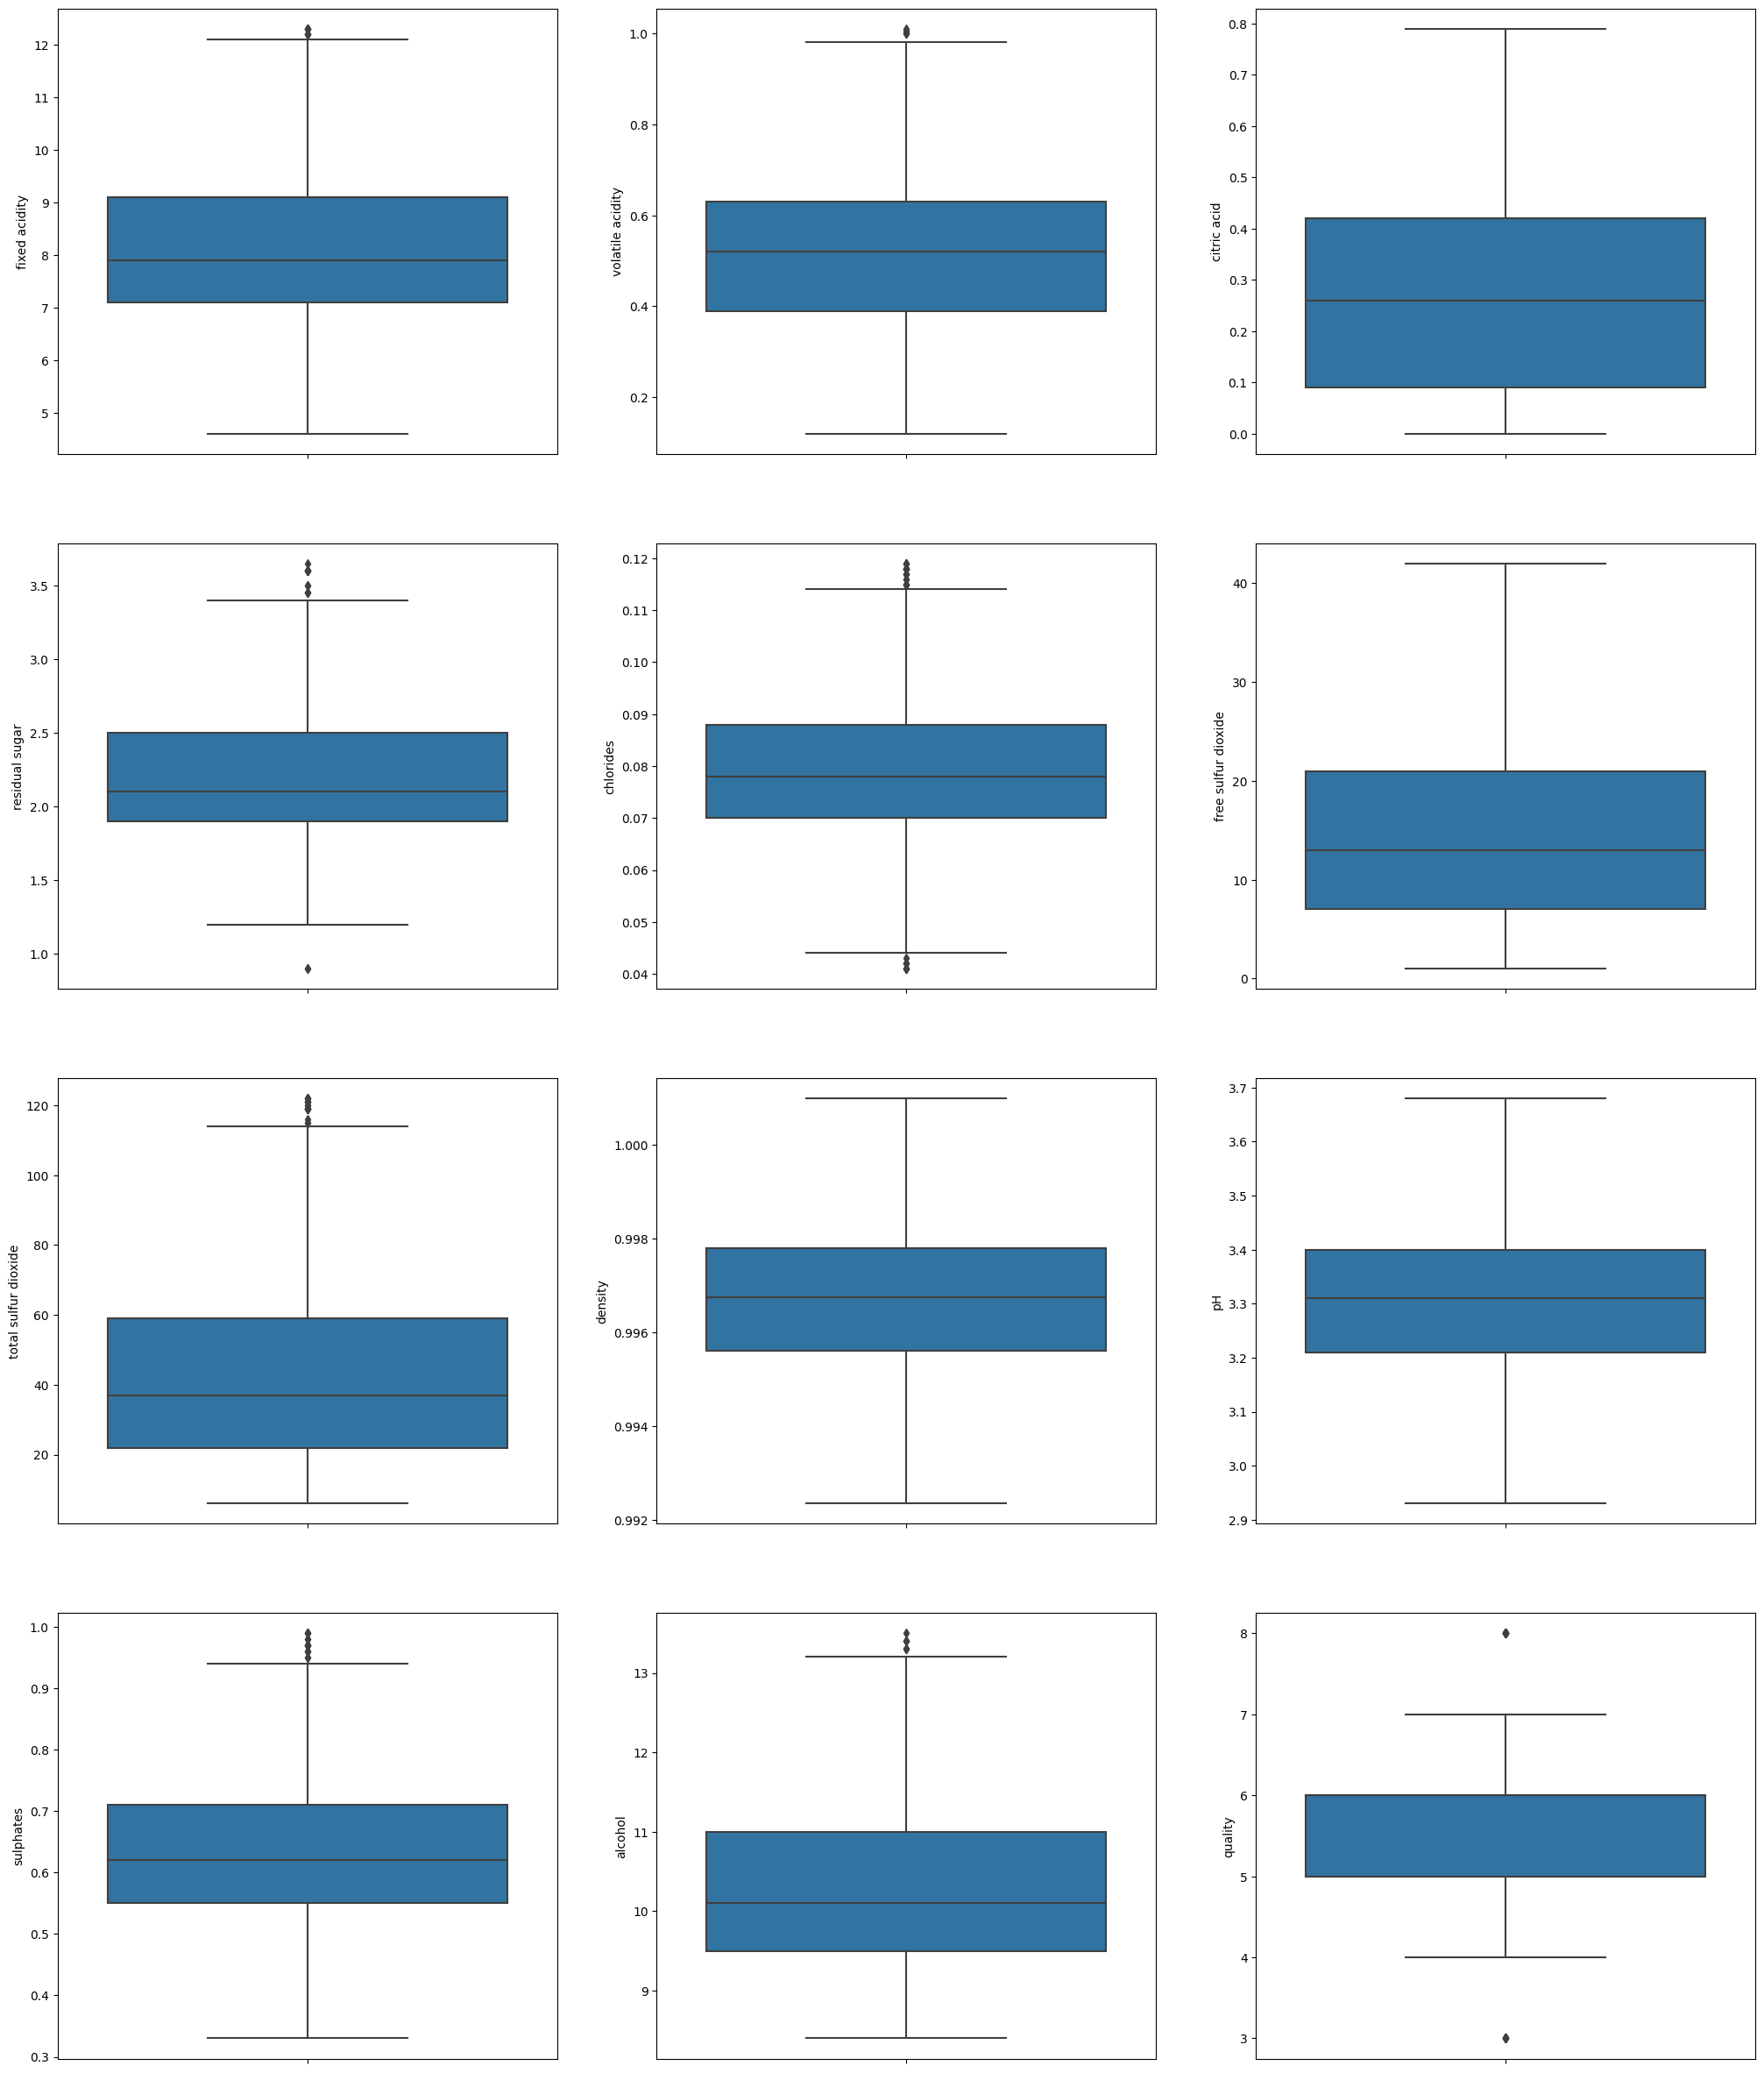

In [11]:
plt.figure(figsize=(25, 70))
for i, col in enumerate(tab.columns):
    ax = plt.subplot(9, 3, i + 1)
    sb.boxplot(y=col, data=tab)

plt.show()


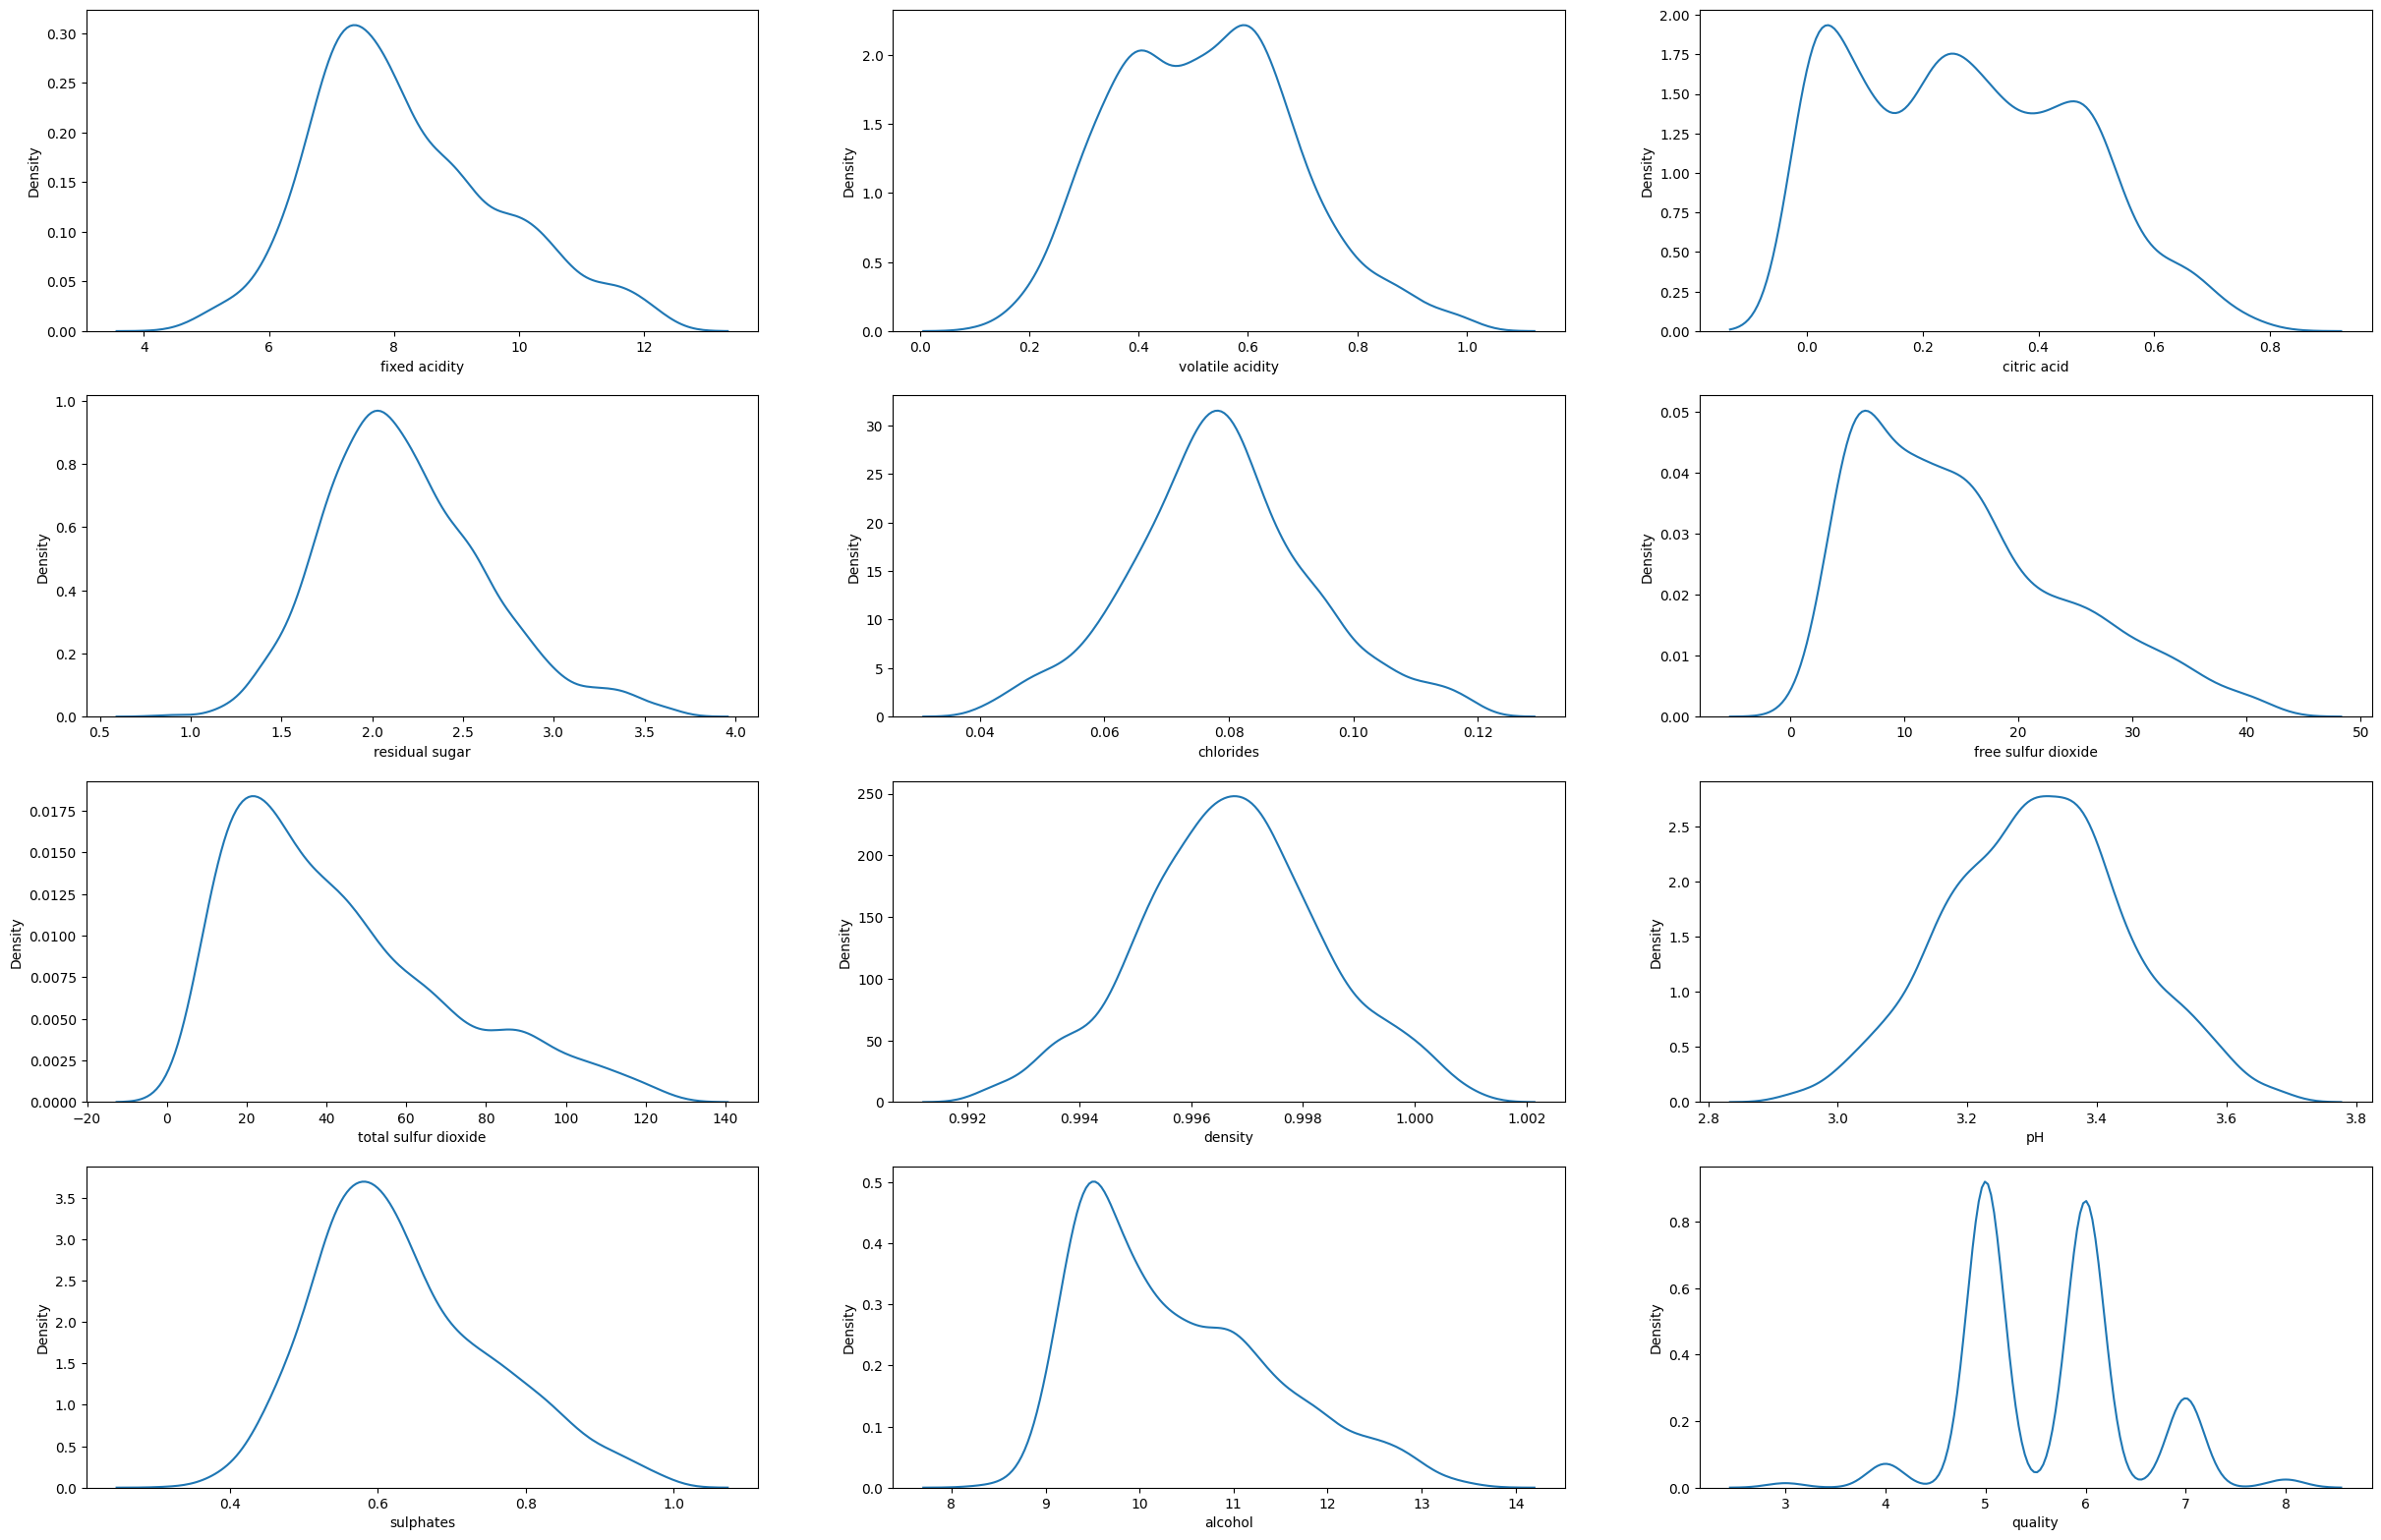

In [12]:
plt.figure(figsize=(30, 45))
for i, col in enumerate(tab.columns):
    if tab[col].dtype != "object":
        ax = plt.subplot(9, 3, i + 1)
        sb.kdeplot(tab[col], ax=ax)
        plt.xlabel(col)

plt.show()


#### The above graphs show minimal skewness in our data. Hence, it is in a reliable form for our analysis and model building.

In [13]:
tab.describe(include="all")


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.194809,0.520949,0.270507,2.186335,0.07886,15.199812,43.085053,0.996737,3.308546,0.636776,10.391328,5.636023
std,1.513949,0.166053,0.193946,0.448335,0.01468,9.165842,27.097404,0.001662,0.140379,0.121113,1.019826,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.04100,1.000000,6.000000,0.992350,2.930000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.07000,7.000000,22.000000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.100000,0.07800,13.000000,37.000000,0.996750,3.310000,0.620000,10.100000,6.000000
75%,9.100000,0.630000,0.420000,2.500000,0.08800,21.000000,59.000000,0.997800,3.400000,0.710000,11.000000,6.000000
max,12.300000,1.010000,0.790000,3.650000,0.11900,42.000000,122.000000,1.001000,3.680000,0.990000,13.500000,8.000000


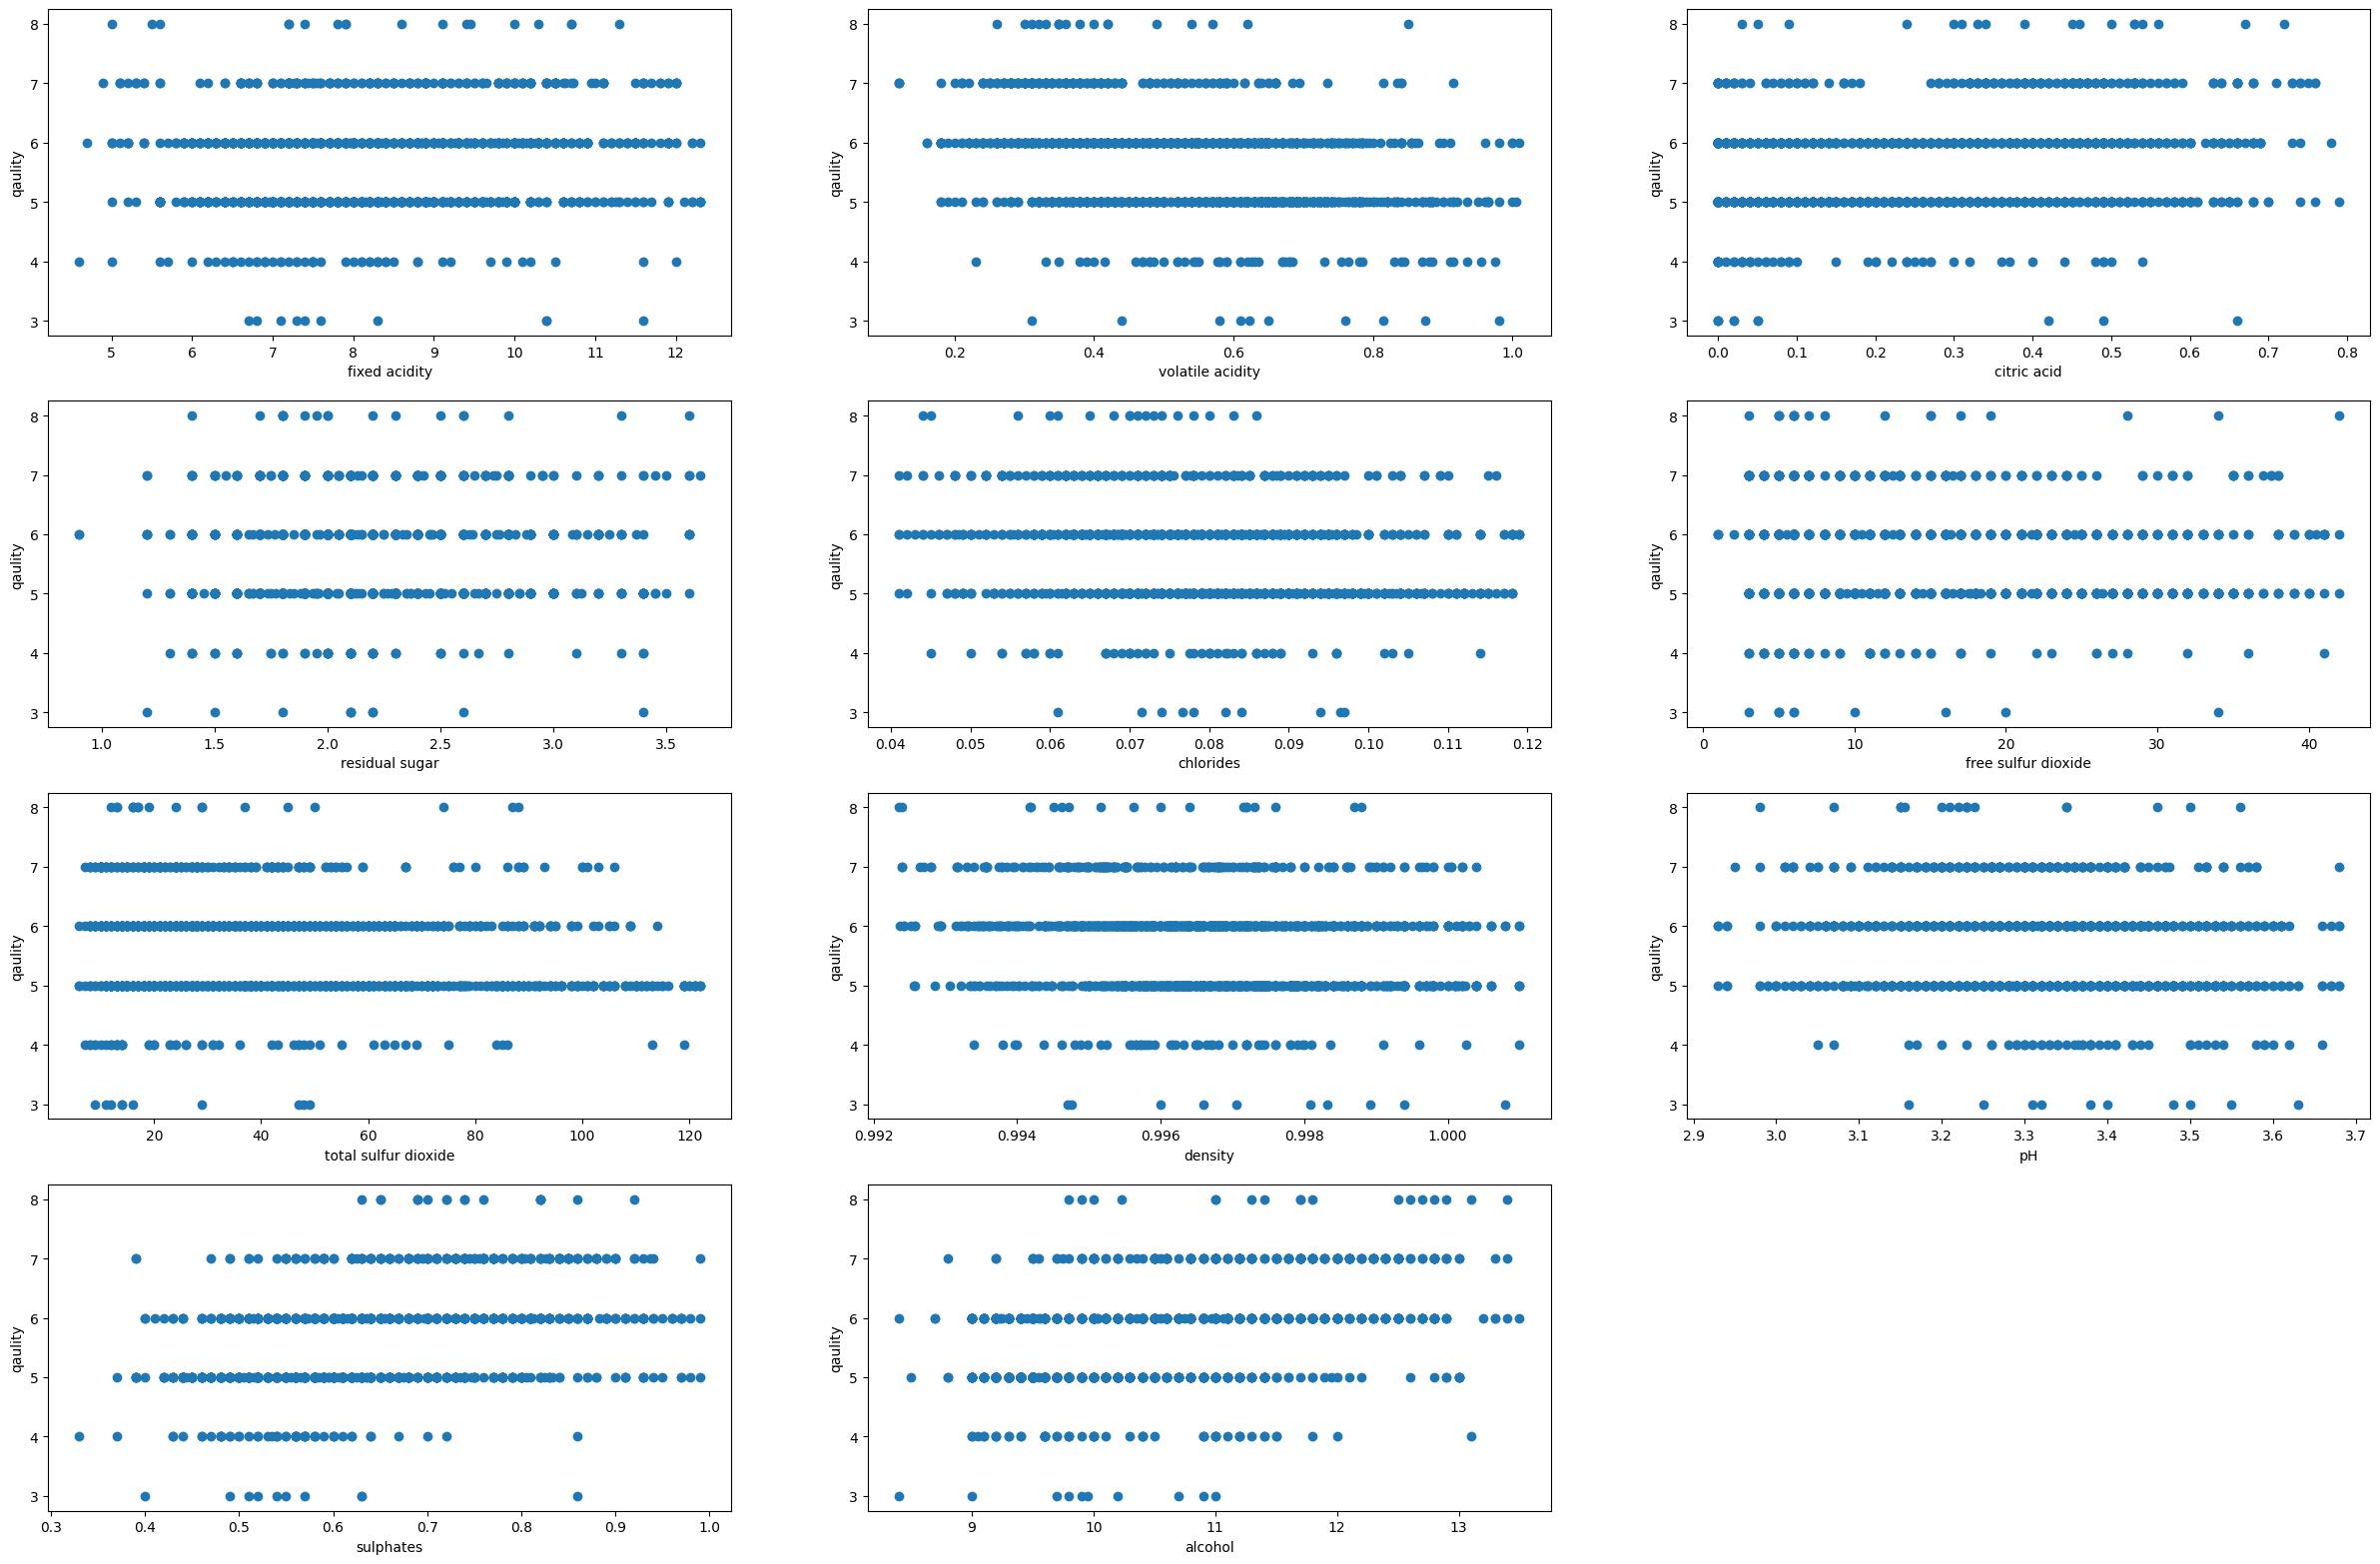

In [14]:
plt.figure(figsize=(30, 45))
tabcol = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
          'pH', 'sulphates', 'alcohol']
for i, col in enumerate(tabcol):
    if tab[col].dtype != "object":
        ax = plt.subplot(9, 3, i + 1)
        plt.scatter(tab[col], tab['quality'])
        plt.xlabel(col)
        plt.ylabel('qaulity')

plt.show()


#### Now we will divide our data in 2 different categories: good and bad

In [15]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
tab['quality'] = pd.cut(x=tab['quality'], bins=bins, labels=labels)
tab


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [16]:
tab['quality'].value_counts()


bad     1382
good     217
Name: quality, dtype: int64

In [17]:
labelencoder_y = LabelEncoder()
tab['quality'] = labelencoder_y.fit_transform(tab['quality'])


In [18]:
tab['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

## HeatMap

<AxesSubplot: >

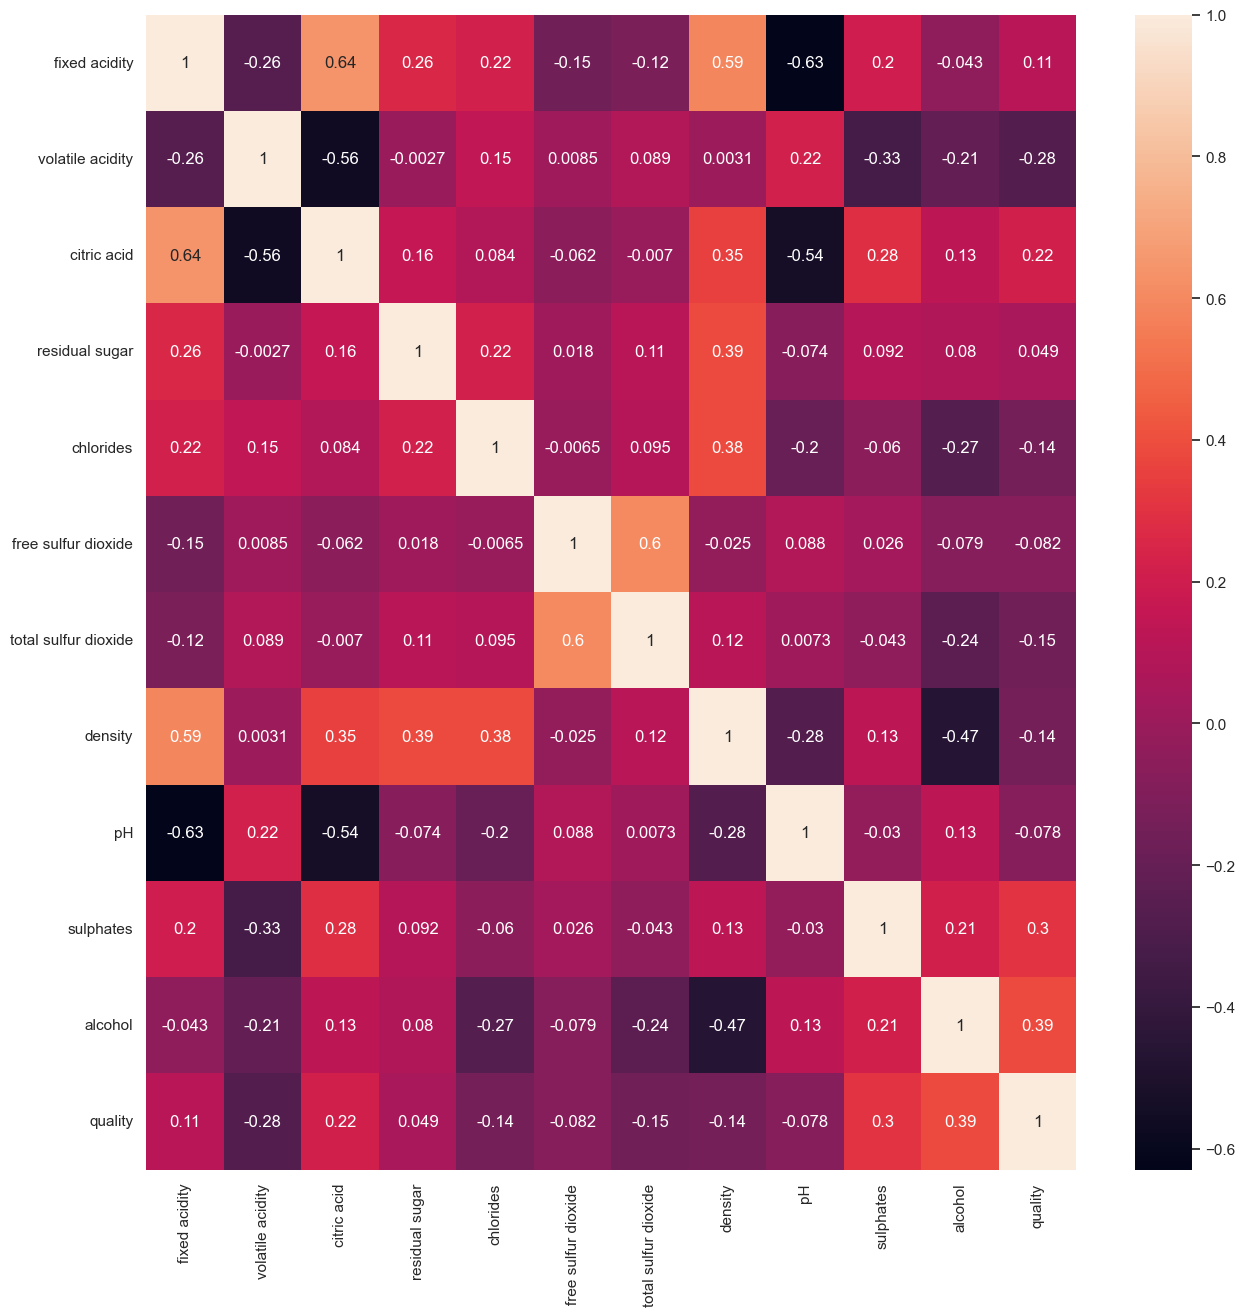

In [19]:
sb.set(rc={"figure.figsize": (15, 15)})
sb.heatmap(tab.corr(), annot=True)


#### From the above Heat Map, we can see that residual sugar, free sulfur dioxide and pH have dependency on out target attribute lesst than 0.1 or more than -0.1. Hence, we won't be using them in our prediction models.

In [20]:
tab = tab.drop(['residual sugar', 'free sulfur dioxide',
                'pH'], axis=1)
tab


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,0
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,0
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,0
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,0
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,0
1595,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,0
1596,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,0


## Spliting Predictor and Target variables

In [21]:
x = tab.iloc[:, :-1]
y = tab.iloc[:, -1]
print(x.shape)
print(y.shape)


(1599, 8)
(1599,)


## Getting test and train sets

In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=40)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1279, 8)
(320, 8)
(1279,)
(320,)


In [23]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)


## Train and test models

In [24]:
Algo = []
Accuracy = []
Precision = []
Recall = []
Specificity = []


#### Function to get result about each model

In [25]:
def reportandresult(test, predict):
    n = confusion_matrix(test, predict)
    tp = n[0][0]
    fp = n[0][1]
    fn = n[1][0]
    tn = n[1][1]
    ac = (tp+tn)/(tp+tn+fn+fp)
    pre = tp/(tp+fp)
    re = tp/(tp+fn)
    spe = tn/(tn+fp)
    Accuracy.append(ac)
    Precision.append(pre)
    Recall.append(re)
    Specificity.append(spe)

    print("Confusion Matrix:")
    print(n)
    print("Accuracy: {0:.3f}".format(ac))
    print("Precision: {0:.3f}".format(pre))
    print("Recall: {0:.3f}".format(re))
    print("Specificity: {0:.3f}".format(spe))


#### Gaussian Naive Bayes Classifier

In [26]:
nb = GaussianNB()
nb.fit(x_train_scaled, y_train)
y_predict = nb.predict(x_test)
Algo.append("Gaussian Naive Bayes Classifier")


c:\Users\my\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [27]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[269   3]
 [ 45   3]]
Accuracy: 0.850
Precision: 0.989
Recall: 0.857
Specificity: 0.500


#### Decision Tree Classifier

In [28]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train, y_train)
y_predict = dtc.predict(x_test)
Algo.append("Decision Tree Classifier")


In [29]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[250  22]
 [ 21  27]]
Accuracy: 0.866
Precision: 0.919
Recall: 0.923
Specificity: 0.551


#### Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(criterion="gini")
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
Algo.append("Random Forest Classifier")


In [31]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[267   5]
 [ 24  24]]
Accuracy: 0.909
Precision: 0.982
Recall: 0.918
Specificity: 0.828


#### Logistic Regression

In [32]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train_scaled, y_train)
y_predict = lr.predict(x_test)
Algo.append("Logistic Regression")


c:\Users\my\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[230  42]
 [ 33  15]]
Accuracy: 0.766
Precision: 0.846
Recall: 0.875
Specificity: 0.263


#### KNN Classifier

In [34]:
knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(x_train, y_train)
y_predict = knc.predict(x_test)
Algo.append("KNN Classifier")


In [35]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[267   5]
 [ 45   3]]
Accuracy: 0.844
Precision: 0.982
Recall: 0.856
Specificity: 0.375


#### XGBoost Classifier

In [36]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_predict = xgb.predict(x_test)
Algo.append("XGBoost Classifier")


In [37]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[259  13]
 [ 21  27]]
Accuracy: 0.894
Precision: 0.952
Recall: 0.925
Specificity: 0.675


#### Support Vector Classifier

In [38]:
svc = SVC()
svc.fit(x_train, y_train)
y_predict = svc.predict(x_test)
Algo.append("Support Vector Classifier")


In [39]:
reportandresult(y_test, y_predict)


Confusion Matrix:
[[272   0]
 [ 48   0]]
Accuracy: 0.850
Precision: 1.000
Recall: 0.850
Specificity: nan


C:\Users\my\AppData\Local\Temp\ipykernel_8272\1351753410.py:10: RuntimeWarning: invalid value encountered in scalar divide
  spe = tn/(tn+fp)


## All Models with Data


In [40]:
Accuracy
rge = {"Algorithm": Algo, "Accuracy": Accuracy, "Precision": Precision,
       "Recall": Recall, "Specificity": Specificity}
rg = pd.DataFrame(rge)
rg


,Algorithm,Accuracy,Precision,Recall,Specificity
0,Gaussian Naive Bayes Classifier,0.850000,0.988971,0.856688,0.500000
1,Decision Tree Classifier,0.865625,0.919118,0.922509,0.551020
2,Random Forest Classifier,0.909375,0.981618,0.917526,0.827586
3,Logistic Regression,0.765625,0.845588,0.874525,0.263158
4,KNN Classifier,0.843750,0.981618,0.855769,0.375000
5,XGBoost Classifier,0.893750,0.952206,0.925000,0.675000
6,Support Vector Classifier,0.850000,1.000000,0.850000,NaN


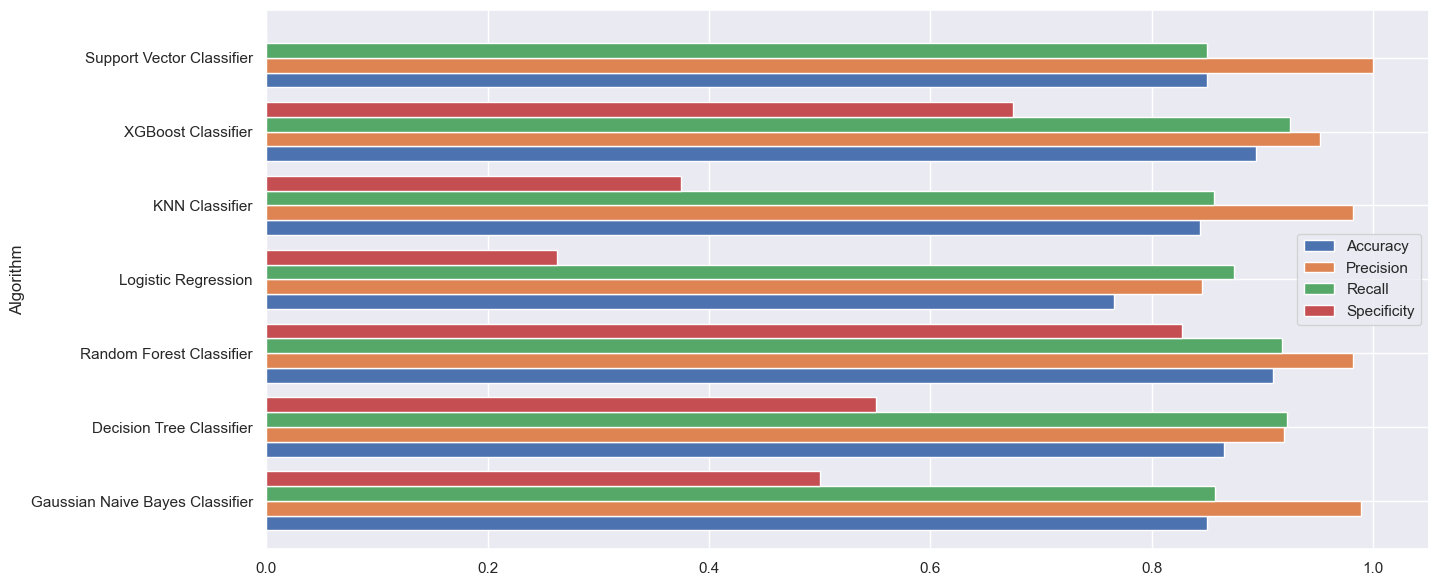

In [41]:
dfe = pd.DataFrame(
    rg, columns=["Algorithm", "Accuracy", "Precision", "Recall", "Specificity"])

dfe.plot(x="Algorithm", y=["Accuracy", "Precision",
         "Recall", "Specificity"], kind="barh", width=0.8, figsize=(15, 7))
plt.show()


#### As Random Forest Classifier has the best accuracy, precision, recall and specificity among all the other models. Also, given that there is a high non-linearity & complex relationship between all the given variables, a tree-based model will outperform a classical regression method. Hence, we will go with Random Forest Classifier as our final predictive model

## Hyperparameter Tuning

In [42]:
notree = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
criterion = ["entropy", "gini", "log_loss"]
feature = ["sqrt", "log2"]
min_sample_split = [2, 3, 4, 5]
bootstrap = [True, False]


In [43]:
random_grid = {'n_estimators': notree,
               'criterion': criterion,
               'max_features': feature,
               'min_samples_split': min_sample_split,
               'bootstrap': bootstrap}


In [44]:
rf = RandomForestClassifier()
rf_grid = GridSearchCV(
    estimator=rf, param_grid=random_grid, cv=3, verbose=2, n_jobs=4)
rf_grid.fit(x_train_scaled, y_train)


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [45]:
n = rf_grid.best_params_
n


{'bootstrap': True,
 'criterion': 'log_loss',
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 20}

In [46]:
rfmodel = RandomForestClassifier(n_estimators=n["n_estimators"], criterion=n['criterion'],
                                 min_samples_split=n['min_samples_split'], max_features=n["max_features"], bootstrap=n['bootstrap'])
rfmodel.fit(x_train_scaled, y_train)
y_predict = rfmodel.predict(x_test_scaled)
reportandresult(y_test, y_predict)


Confusion Matrix:
[[267   5]
 [ 27  21]]
Accuracy: 0.900
Precision: 0.982
Recall: 0.908
Specificity: 0.808


In [47]:
x_test.to_csv('tester.csv', index=False)


## Model Saving

In [48]:
import pickle


In [49]:
data = {"model": rfmodel, "scaler": sc}
with open("prediction_model", 'wb') as file:
    pickle.dump(data, file)


In [50]:
with open("prediction_model", 'rb') as file:
    ld_model = pickle.load(file)
model = ld_model["model"]
scaler = ld_model["scaler"]

# test = np.array([[8, 0.63, 0.3, 2.4, 0.072, 16, 42, 0.98, 3.2,  0.6, 12]])
dic = {'fixed acidity': [7.9], 'volatile acidity': [0.35], 'citric acid': [0.46],
       'chlorides': [0.078],  'total sulfur dioxide': [37], 'density': [0.9973],
       'sulphates': [0.86], 'alcohol': [12.8]}

newent = pd.DataFrame(dic)
x_test = pd.concat([x_test, newent], axis=0)
# print(x_test.iloc[-1])
testsc = scaler.fit_transform(x_test)

y = model.predict([testsc[-1]])
print(y)


[1]
